In [15]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Read the trip fare data

In [2]:
header_row = ['medallion','hack_license','vendor_id','pickup_datetime','rate_code','store_and_fwd_flag','dropoff_datetime','passenger_count','trip_time_in_secs', 'trip_distance',
'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','payment_type',
'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount','neighborhood']

In [3]:
df = pd.read_csv('MR_sep_comma/trip_fare_neighbor_12_commaKey.csv', names=header_row)

##Add the waiting period

In [4]:
df['waiting_period'] = pd.to_datetime(df['pickup_datetime'])-pd.to_datetime(df['dropoff_datetime'].shift(1))

In [5]:
df

,medallion,hack_license,vendor_id,pickup_datetime,rate_code,store_and_fwd_flag,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,neighborhood,waiting_period
0,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 10:00:22,1,N,2013-12-01 10:02:13,1,111,0.50,...,40.782139,NOC,4.0,0,0.5,0.10,0.20,4.50,Upper West Side,NaT
1,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 10:03:59,1,N,2013-12-01 10:25:21,1,1281,6.10,...,40.720493,CSH,21.0,0,0.5,0.00,0.00,21.50,UNKNOWN,0 days 00:01:46
2,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 10:31:33,1,N,2013-12-01 10:46:59,1,925,6.10,...,40.758705,CRD,20.0,0,0.5,1.00,0.00,21.50,Upper East Side,0 days 00:06:12
3,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 11:07:53,1,N,2013-12-01 11:14:00,1,366,0.70,...,40.752953,CSH,6.0,0,0.5,0.00,0.00,6.50,East Village,0 days 00:20:54
4,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 11:22:53,1,N,2013-12-01 11:31:04,1,491,2.30,...,40.761131,CSH,9.5,0,0.5,0.00,0.00,10.00,Greenwich Village,0 days 00:08:53
5,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 11:42:09,1,N,2013-12-01 11:47:46,1,337,0.90,...,40.758190,NOC,5.5,0,0.5,0.00,0.00,6.00,Midtown,0 days 00:11:05
6,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 11:51:11,1,N,2013-12-01 11:59:38,1,507,1.20,...,40.749001,CRD,7.5,0,0.5,1.60,0.00,9.60,Midtown,0 days 00:03:25
7,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 12:02:14,1,Y,2013-12-01 12:13:00,1,645,0.60,...,40.757610,CRD,8.0,0,0.5,2.55,0.00,11.05,UNKNOWN,0 days 00:02:36
8,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 12:47:29,1,N,2013-12-01 13:00:08,1,758,1.00,...,40.747910,CRD,9.0,0,0.5,1.90,0.00,11.40,Upper West Side,0 days 00:34:29
9,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 13:05:45,1,N,2013-12-01 13:10:21,1,275,0.90,...,40.736931,CSH,5.5,0,0.5,0.00,0.00,6.00,UNKNOWN,0 days 00:05:37


###Add pickup hours

In [6]:
pickup_hour = np.zeros(len(df))

In [7]:
pickup_timestamp = pd.to_datetime(df['pickup_datetime'])

In [8]:
for i in range(len(df)):
    pickup_hour[i] = pickup_timestamp[i].hour

In [9]:
df['pickup_hour'] = pickup_hour

##convert waiting period from timedelta object to seconds

In [10]:
df['waiting_seconds'] = 0

In [ ]:
for i in range(1, len(df)):
    df['waiting_seconds'][i] = df['waiting_period'][i].total_seconds()

In [3]:
df

,medallion,hack_license,vendor_id,pickup_datetime,rate_code,store_and_fwd_flag,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,neighborhood,waiting_period,pickup_hour,waiting_seconds
0,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 10:00:22,1,N,2013-12-01 10:02:13,1,111,0.50,...,4.0,0,0.5,0.10,0.20,4.50,Upper West Side,NaN,10,0
1,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 10:03:59,1,N,2013-12-01 10:25:21,1,1281,6.10,...,21.0,0,0.5,0.00,0.00,21.50,UNKNOWN,00:01:46,10,106
2,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 10:31:33,1,N,2013-12-01 10:46:59,1,925,6.10,...,20.0,0,0.5,1.00,0.00,21.50,Upper East Side,00:06:12,10,372
3,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 11:07:53,1,N,2013-12-01 11:14:00,1,366,0.70,...,6.0,0,0.5,0.00,0.00,6.50,East Village,00:20:54,11,1254
4,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 11:22:53,1,N,2013-12-01 11:31:04,1,491,2.30,...,9.5,0,0.5,0.00,0.00,10.00,Greenwich Village,00:08:53,11,533
5,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 11:42:09,1,N,2013-12-01 11:47:46,1,337,0.90,...,5.5,0,0.5,0.00,0.00,6.00,Midtown,00:11:05,11,665
6,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 11:51:11,1,N,2013-12-01 11:59:38,1,507,1.20,...,7.5,0,0.5,1.60,0.00,9.60,Midtown,00:03:25,11,205
7,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 12:02:14,1,Y,2013-12-01 12:13:00,1,645,0.60,...,8.0,0,0.5,2.55,0.00,11.05,UNKNOWN,00:02:36,12,156
8,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 12:47:29,1,N,2013-12-01 13:00:08,1,758,1.00,...,9.0,0,0.5,1.90,0.00,11.40,Upper West Side,00:34:29,12,2069
9,00005007A9F30E289E760362F69E4EAD,11DD39E40329CFF79635A99A574E0E8B,CMT,2013-12-01 13:05:45,1,N,2013-12-01 13:10:21,1,275,0.90,...,5.5,0,0.5,0.00,0.00,6.00,UNKNOWN,00:05:37,13,337


In [4]:
grouped_hours = df.groupby('pickup_hour')

In [5]:
waiting_median = grouped_hours.median()['waiting_seconds']

In [24]:
waiting_median

pickup_hour
0               420
1               540
2               635
3               764
4               764
5              1260
6               795
7               480
8               360
9               420
10              454
11              412
12              300
13              307
14              300
15              240
16              217
17              214
18              226
19              240
20              300
21              300
22              300
23              360
Name: waiting_seconds, dtype: int64

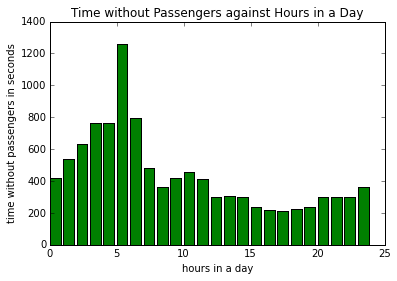

In [33]:
plt.figure()
plt.bar(waiting_median.index, waiting_median.values, color='g')
plt.xlabel('hours in a day')
plt.ylabel('time without passengers in seconds')
plt.title('Time without Passengers against Hours in a Day')
plt.show()